## CS412 Machine Learning Spring 2024 Kanat Özgen

Question 1: Random Points

In [2]:
import numpy as np

In [3]:
def random_points(num_points, num_dimensions):
    return np.random.normal(size=(num_points, num_dimensions))

In [4]:
def average_distance_sp(points, selected_point):
    distances = np.sqrt(np.sum((points - selected_point)**2, axis=1))
    return np.mean(distances)

In [5]:
def minimum_distance_sp(points, selected_point):
    distances = np.sqrt(np.sum((points - selected_point)**2, axis=1))
    distances = distances[distances != 0]
    return np.min(distances)

In [6]:
def closest_to_average_ratio(min_dist, avg_dist):
    if avg_dist == 0:
        return float('inf')
    return min_dist / avg_dist

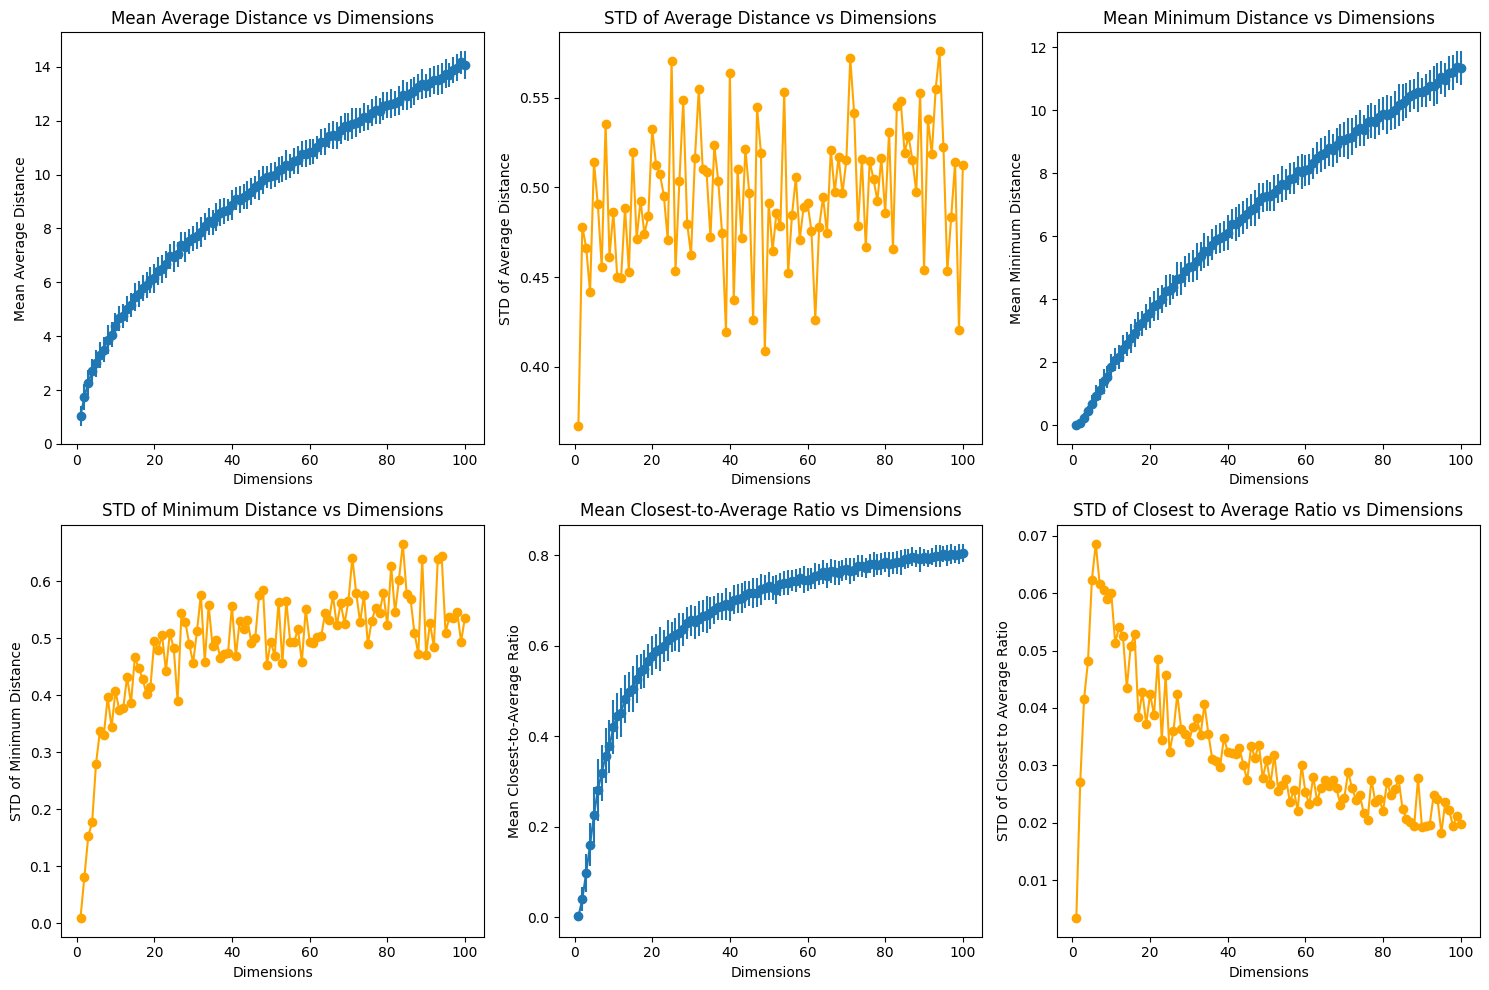

In [17]:
mean_avg_distances = []
std_avg_distances = []
mean_min_distances = []
std_min_distances = []
mean_ratios = []
std_ratios = []

for d in range(1, 101):
    avg_distances = []
    min_distances = []
    ratios = []

    Sd = random_points(1000, d)

    for _ in range(100):
        selected_point = Sd[np.random.randint(0, len(Sd))]
        avg_dist = average_distance_sp(Sd, selected_point)
        min_dist = minimum_distance_sp(Sd, selected_point)
        ratio = closest_to_average_ratio(min_dist, avg_dist)
        avg_distances.append(avg_dist)
        min_distances.append(min_dist)
        ratios.append(ratio)

    mean_avg_distances.append(np.mean(avg_distances))
    std_avg_distances.append(np.std(avg_distances))
    mean_min_distances.append(np.mean(min_distances))
    std_min_distances.append(np.std(min_distances))
    mean_ratios.append(np.mean(ratios))
    std_ratios.append(np.std(ratios))

dimensions = np.arange(1, 101)
plt.figure(figsize=(15, 10))

# Mean Average Distance Plot
plt.subplot(2, 3, 1)
plt.errorbar(dimensions, mean_avg_distances, yerr=std_avg_distances, label='Mean of Average Distance', fmt='-o')
plt.title('Mean Average Distance vs Dimensions')
plt.xlabel('Dimensions')
plt.ylabel('Mean Average Distance')

# Standard Deviation of Average Distance Plot
plt.subplot(2, 3, 2)
plt.errorbar(dimensions, std_avg_distances, label='STD of Average Distance', fmt='-o', color='orange')
plt.title('STD of Average Distance vs Dimensions')
plt.xlabel('Dimensions')
plt.ylabel('STD of Average Distance')

# Mean Minimum Distance Plot
plt.subplot(2, 3, 3)
plt.errorbar(dimensions, mean_min_distances, yerr=std_min_distances, label='Mean of Minimum Distance', fmt='-o')
plt.title('Mean Minimum Distance vs Dimensions')
plt.xlabel('Dimensions')
plt.ylabel('Mean Minimum Distance')

# Standard Deviation of Minimum Distance Plot
plt.subplot(2, 3, 4)
plt.errorbar(dimensions, std_min_distances, label='STD of Minimum Distance', fmt='-o', color='orange')
plt.title('STD of Minimum Distance vs Dimensions')
plt.xlabel('Dimensions')
plt.ylabel('STD of Minimum Distance')

# Mean Closest-to-Average Ratio Plot
plt.subplot(2, 3, 5)
plt.errorbar(dimensions, mean_ratios, yerr=std_ratios, label='Mean Closest-to-Average Ratio', fmt='-o')
plt.title('Mean Closest-to-Average Ratio vs Dimensions')
plt.xlabel('Dimensions')
plt.ylabel('Mean Closest-to-Average Ratio')

# Standard Deviation of Closest to Average Ratio Plot
plt.subplot(2, 3, 6)
plt.errorbar(dimensions, std_ratios, label='STD of Closest to Average Ratio', fmt='-o', color='orange')
plt.title('STD of Closest to Average Ratio vs Dimensions')
plt.xlabel('Dimensions')
plt.ylabel('STD of Closest to Average Ratio')

plt.tight_layout()
plt.show()


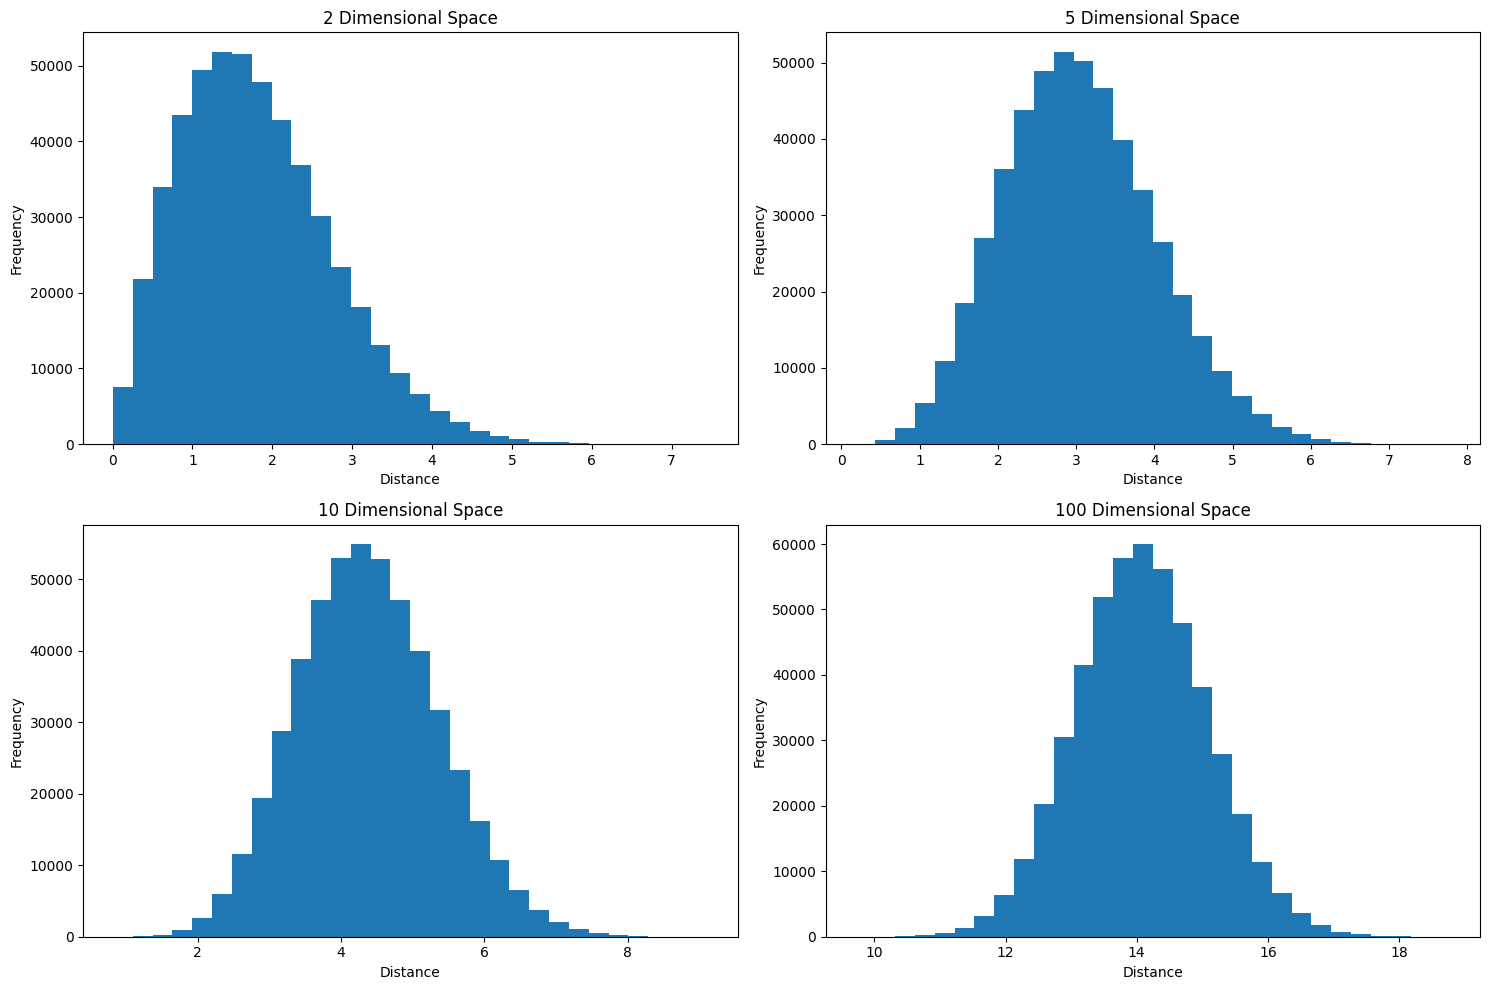

In [14]:
plt.figure(figsize=(15, 10))

for i, d in enumerate([2, 5, 10, 100]):
    points = random_points(1000, d)
    distances = np.sqrt(np.sum((points[:, np.newaxis] - points) ** 2, axis=2))
    distances = distances[np.triu_indices_from(distances, k=1)]

    plt.subplot(2, 2, i + 1)
    plt.hist(distances, bins=30)
    plt.title(f'{d} Dimensional Space')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Here, curse of dimensionality is in place. If we have a lot of dimensions, pairwise distances will increase and thus creating a framework of information which is not very easy to analyse via distance measures such as kNN etc.

Question 2: Fashion MNIST dataset

In [ ]:
# Libraries used
import numpy as np
from keras.datasets import fashion_mnist
from sklearn.neighbors import KNeighborsClassifier as KNN
from matplotlib import pyplot as plt

In [ ]:
(X, y), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Reshape the model
print('X shape before: ', X.shape)
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print('X_test shape after: ', X_test.shape)

X shape before:  (60000, 28, 28)
X_test shape after:  (10000, 784)


[[   0 6000]
 [   1 6000]
 [   2 6000]
 [   3 6000]
 [   4 6000]
 [   5 6000]
 [   6 6000]
 [   7 6000]
 [   8 6000]
 [   9 6000]]


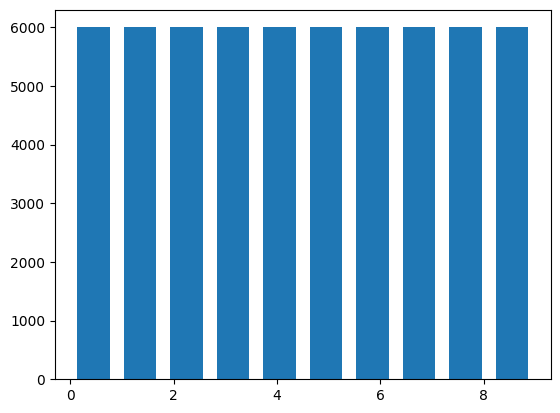

In [ ]:
# Plot the dist of the data and also develop a baseline model
def label_count_pairs():
  list = [[i, 0] for i in np.unique(y)]
  for i in np.unique(y):
    for j in y:
      if (i == j):
        list[i][1] += 1
  return list


arr = np.array(label_count_pairs())
print(arr)

plt.hist(y, rwidth=0.7)
plt.show()

The distribution of the data is not skewed.

GridSearch determined the best hyperparameter to be 7. Further analysis will be made.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_new = X
X_train_normalized = scaler.fit_transform(X_new)
X_test_normalized = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_normalized, y, test_size=0.2, stratify=y)

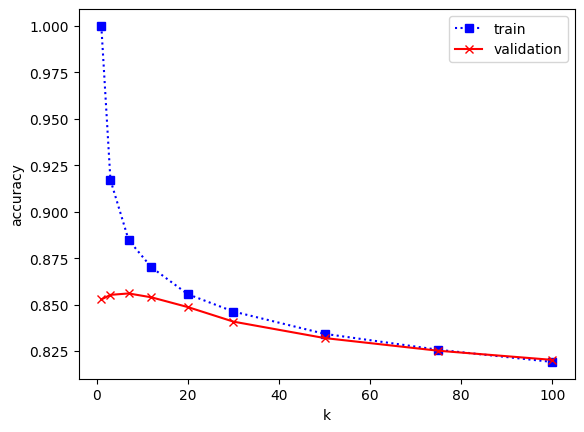

In [ ]:
ks = [1, 3, 7, 12, 20, 30, 50, 75, 100]
train_accs = []
val_accs = []
for k in ks:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accs.append(knn.score(X_train, y_train))
    val_accs.append(knn.score(X_val, y_val))
plt.figure()
plt.plot(ks, train_accs, "bs:", label="train")
plt.plot(ks, val_accs, "rx-", label="validation")
plt.legend()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

Here, 7 is still the best hyperparameter, closely followed by 3.

In [ ]:
# Now let's find the best distance metric.
from sklearn.metrics import accuracy_score

metrics = ["manhattan", "euclidean"]

for i in metrics:
  model = KNN(n_neighbors = 7, metric=i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  val_acc = accuracy_score(y_pred=y_pred, y_true=y_val)
  print(i + ":" + str(val_acc) + "\n")

manhattan:0.8635833333333334

euclidean:0.856



It seems like manhattan is better than euclidean.

In [ ]:
# Compiling the final model with the manhattan distance and k=7 hyperparameters

In [ ]:
model = KNN(n_neighbors = 7, metric=i)
model.fit(X_train_normalized, y)
y_pred = model.predict(X_test_normalized)
val_acc = accuracy_score(y_pred=y_pred, y_true=y_test)
print(val_acc)

0.8541


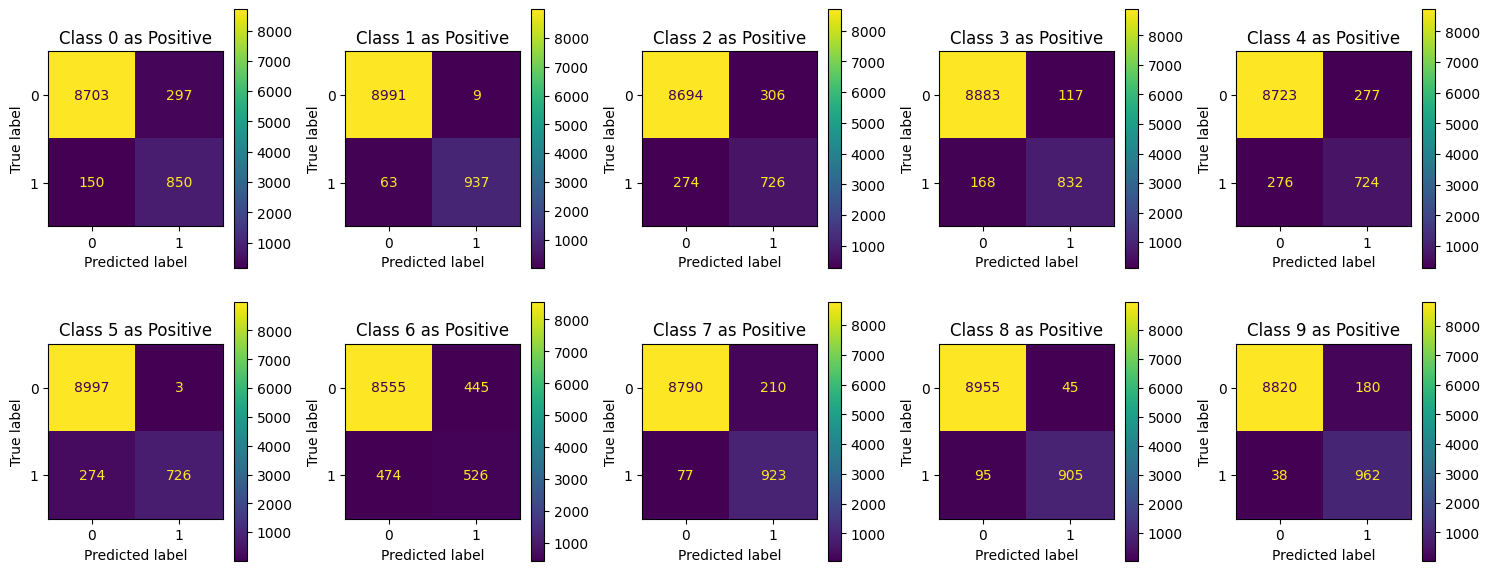

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred_proba = knn.predict_proba(X_test_normalized)

y_pred = np.argmax(y_pred_proba, axis=1)

# Number of unique classes
n_classes = y_pred_proba.shape[1]

fig, axs = plt.subplots(2, 5, figsize=(15, 6))  # Adjust the size as needed

for i in range(n_classes):
    # Treat the i-th class as the positive class
    y_test_binary = (y_test == i)
    y_pred_binary = (y_pred == i)

    # Calculate the confusion matrix for the binary problem
    cm = confusion_matrix(y_test_binary, y_pred_binary)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axs[i // 5, i % 5], values_format='.4g')
    axs[i // 5, i % 5].set_title(f'Class {i} as Positive')
    axs[i // 5, i % 5].grid(False)

plt.tight_layout()
plt.show()

In [ ]:
y_pred_proba

array([[0.01, 0.01, 0.02, ..., 0.02, 0.4 , 0.53],
       [0.01, 0.  , 0.66, ..., 0.  , 0.01, 0.  ],
       [0.23, 0.19, 0.19, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.28, 0.01, 0.19, ..., 0.  , 0.  , 0.  ],
       [0.18, 0.16, 0.11, ..., 0.  , 0.  , 0.  ],
       [0.02, 0.01, 0.06, ..., 0.  , 0.85, 0.01]])

Model is very incapable in classifying 6th class.

In [ ]:
from sklearn.metrics import classification_report

# Assuming 'X_test_normalized' is your normalized features for the test set
y_pred = model.predict(X_test_normalized)

for i in range(10):
    for j in range(i+1, 10):  # Start from i+1 to avoid duplicate pairs and comparing a class with itself
        # Create a mask for the test set for the current pair of classes
        mask = (y_test == i) | (y_test == j)
        # Apply the mask to create a binary problem
        binary_y_test = np.where(y_test[mask] == i, 1, 0)
        binary_y_pred = np.where(y_pred[mask] == i, 1, 0)

        # Generate the classification report for the current binary problem
        print(f"Classification report for classes {i} (positive) and {j} (negative):")
        print(classification_report(binary_y_test, binary_y_pred, target_names=[f'Class {j}', f'Class {i}']))


Classification report for classes 0 (positive) and 1 (negative):
              precision    recall  f1-score   support

     Class 1       0.87      0.99      0.93      1000
     Class 0       0.99      0.86      0.92      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.92      2000
weighted avg       0.93      0.93      0.92      2000

Classification report for classes 0 (positive) and 2 (negative):
              precision    recall  f1-score   support

     Class 2       0.87      0.98      0.92      1000
     Class 0       0.98      0.86      0.91      1000

    accuracy                           0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000

Classification report for classes 0 (positive) and 3 (negative):
              precision    recall  f1-score   support

     Class 3       0.87      0.96      0.92      1000
     Class 0       0.96      0.86      0.9

Model has difficulties classifying class 6, with classes 0, 7, 8 and 9.